In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Train_Final.csv")
test = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Test_Final.csv")

In [4]:
x_train = train.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_train = train['Target']

In [5]:
x_test = test.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_test = test['Target']

In [10]:
svc = SVC(random_state=123, probability=True)

params = { "C": [0.01, 0.1, 1],
            "degree": [2, 3],
            "kernel": ['poly', 'rbf'],
          }

model = RandomizedSearchCV(svc, params, random_state=123, n_jobs = 1, n_iter = 3, cv = 2, scoring="roc_auc")

### Entreno el modelo

In [11]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=SVC(probability=True, random_state=123),
                   n_iter=3, n_jobs=1,
                   param_distributions={'C': [0.01, 0.1, 1], 'degree': [2, 3],
                                        'kernel': ['poly', 'rbf']},
                   random_state=123, scoring='roc_auc')

Mejores hiperparametros encontrados

In [12]:
best_params = model.best_estimator_.get_params()
best_params

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

El Randomized Search ya me devuelve el mejor modelo posible, así que no es necesario volver a entrenar.

## Scores

Calculo el score para el set de entrenamiento

In [13]:
roc_auc_score(y_train, model.predict_proba(x_train)[:,1])

0.9208888535557638

Calculo el score para el set de test:

In [14]:
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.8479780321609922

## Matriz de Confusión

Text(0.5, 1.0, 'Confusion matrix')

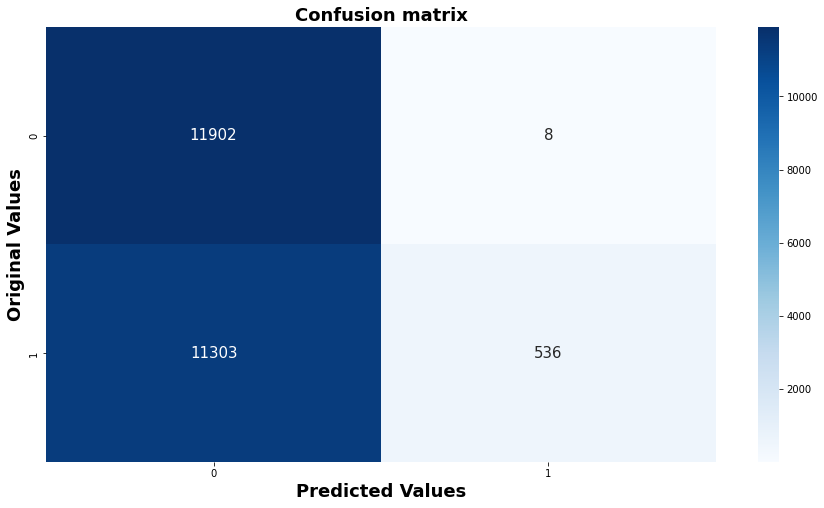

In [15]:
C = confusion_matrix(y_test, model.predict(x_test))  
plt.figure(figsize=(15,8))
labels = [0,1]
sns.heatmap(C, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels, annot_kws={'size': 15})
plt.xlabel('Predicted Values', fontsize=18, fontweight='bold')
plt.ylabel('Original Values', fontsize=18, fontweight='bold')
plt.title("Confusion matrix", fontsize = 18, fontweight='bold')